## **Unidad N° 2 -  Base de datos**:  
###Contenidos:
- Tipos de datos (estructurados y no estructurados) y su tratamiento.
- Limpieza e integración de datos. Técnicas de curación de datos e ingeniería de características (feature engineering).
- Estandarización de procesos
- Principios en el manejo de base de datos
- Bases de datos
- Uso de Python. Librerías: pandas, numpy, scipy.



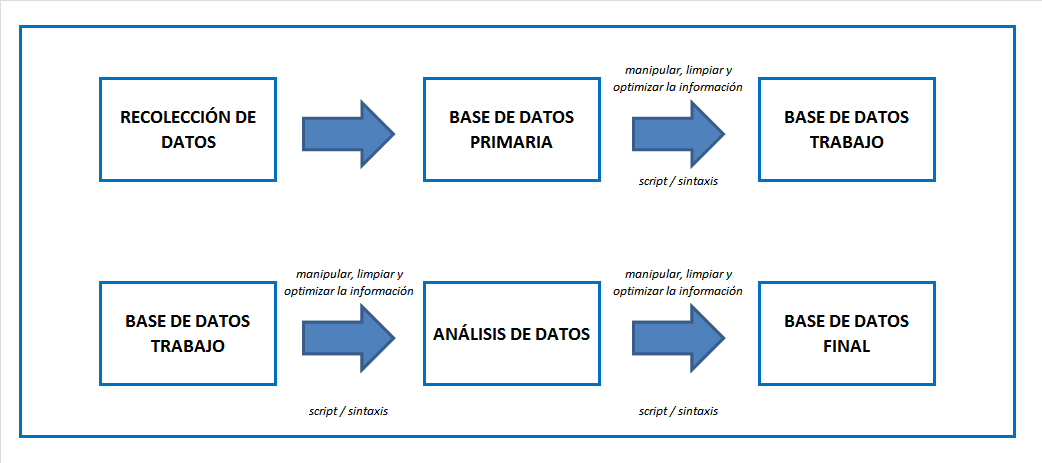

# Manipulando Datos con Pandas (continuación...)

<p align="center">
<img
     src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Pandas_logo.svg"
     alt="pypl"
     width=300
     height=>
</p>


[Pandas](http://pandas.pydata.org) es una biblioteca para manipulación y análisis de datos basada en Numpy. Aporta nuevas estructuras de datos de alto nivel que extienden datos almacenados en arrays, aportando más semántica y nuevas operaciones.

Pandas introduce dos estructuras de datos principales: `Series` y `DataFrame`.  

In [ ]:
import pandas as pd
## Establecer el formato de los números en el DataFrame para que no usen notación científica
#pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
import numpy as np

## Preparación de  los Datos.

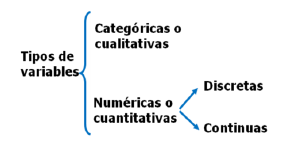

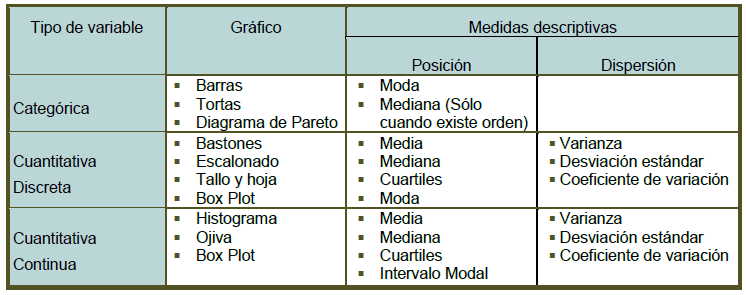

## **B.5.**  Cargar Bases de Datos localizadas en Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



*   Ubico la carpeta en Google Drive
*   Botón derecho copio la ruta de acceso a la base de datos


In [ ]:
df5 = pd.read_csv("/content/drive/MyDrive/08_ ICD con Python /Unidad 2: Base de datos/ahora12_facturacion.tsv", sep="\t") #encoding="latin1" o encoding="ISO-8859-1"  sep=";" sep="\t"

In [ ]:
df5.head()

,anio,mes,mes-anio,provincia,rubro A12,Facturacion
0,2019,1,ene-19,BUENOS AIRES,Anteojos,"30,878,823"
1,2019,1,ene-19,BUENOS AIRES,Artículos de Librería,"4,657,723"
2,2019,1,ene-19,BUENOS AIRES,Balnearios,"5,839,079"
3,2019,1,ene-19,BUENOS AIRES,Bicicletas,"20,645,150"
4,2019,1,ene-19,BUENOS AIRES,Calzado y Marroquinería,"229,075,801"


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19588 entries, 0 to 19587
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anio          19588 non-null  int64 
 1   mes           19588 non-null  int64 
 2   mes-anio      19588 non-null  object
 3   provincia     19588 non-null  object
 4   rubro A12     19588 non-null  object
 5   Facturacion   19588 non-null  object
dtypes: int64(2), object(4)
memory usage: 918.3+ KB


In [ ]:
df5.dtypes

,0
anio,int64
mes,int64
mes-anio,object
provincia,object
rubro A12,object
Facturacion,object


**Metodo** "*describe*"

Es un método de Pandas que genera un resumen estadístico de las columnas numéricas (por defecto) de un DataFrame.

In [ ]:
df5.describe()

,anio,mes
count,19588.000000,19588.000000
mean,2020.249132,6.407903
std,1.509999,3.568874
min,2019.000000,1.000000
25%,2019.000000,3.000000
50%,2020.000000,6.000000
75%,2021.000000,10.000000
max,2190.000000,12.000000


📊 ¿Qué muestra?
Para cada columna numérica de df5, devuelve:


Estadístico	Significado
count	Cantidad de valores no nulos
mean	Media aritmética
std	Desviación estándar
min	Valor mínimo
25%	Primer cuartil (percentil 25)
50%	Mediana (percentil 50)
75%	Tercer cuartil (percentil 75)
max	Valor máximo

In [ ]:
df5['Facturacion'].describe()

KeyError: 'Facturacion'

**Renombrar** sólo una columna específica (por ejemplo, cambiar 'facturacion ' a 'facturacion'), usamos el método *rename*

**Eliminar espacios** al inicio y al final de todas los nombres de las columnas

In [ ]:
df5.columns = df5.columns.str.strip()

In [ ]:
df5 = df5.rename(columns={'Facturacion ': 'facturacion'})

Notación científica en los resultados

In [ ]:
df5.describe (). apply (lambda s: s.apply (lambda x: format (x, 'f')))

,anio,mes
count,19588.000000,19588.000000
mean,2020.249132,6.407903
std,1.509999,3.568874
min,2019.000000,1.000000
25%,2019.000000,3.000000
50%,2020.000000,6.000000
75%,2021.000000,10.000000
max,2190.000000,12.000000


# **C.** ACCIONES SOBRE LAS COLUMNAS.

## **C.1.**  Identificar columnas.

In [ ]:
df5.columns

Index(['anio', 'mes', 'mes-anio', 'provincia', 'rubro A12', 'facturacion'], dtype='object')

Index([...]): Es una estructura de pandas que se utiliza para etiquetar las filas o columnas de un DataFrame. En este caso, es un Index que está mostrando los nombres de las columnas de un DataFrame.

## **C.2.**  Eliminar una columna.

In [ ]:
df5.drop(columns='anio', axis=1)

,mes,mes-anio,provincia,rubro A12,facturacion
0,1,ene-19,BUENOS AIRES,Anteojos,"30,878,823"
1,1,ene-19,BUENOS AIRES,Artículos de Librería,"4,657,723"
2,1,ene-19,BUENOS AIRES,Balnearios,"5,839,079"
3,1,ene-19,BUENOS AIRES,Bicicletas,"20,645,150"
4,1,ene-19,BUENOS AIRES,Calzado y Marroquinería,"229,075,801"
...,...,...,...,...,...
19583,2,feb-22,TUCUMAN,Perfumeria,"6,809,876"
19584,2,feb-22,TUCUMAN,Servicios de cuidado personal,"590,783"
19585,2,feb-22,TUCUMAN,Servicios de preparacion para el deporte,"791,256"
19586,2,feb-22,TUCUMAN,Servicios tecnicos de electronica y electrodom...,"2,197,028"


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19588 entries, 0 to 19587
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   mes          19588 non-null  int64 
 1   mes-anio     19588 non-null  object
 2   provincia    19588 non-null  object
 3   rubro A12    19588 non-null  object
 4   facturacion  19588 non-null  object
dtypes: int64(1), object(4)
memory usage: 765.3+ KB


In [ ]:
df5=df5.drop(columns='anio')

¿ Cuál es la diferencia entre "df5.drop(columns='anio', axis=1)" y "df5=df5.drop(columns='anio')" ?

## **C.3.**  Eliminar N columnas.

In [ ]:
df5.drop(columns= ['anio', 'mes'])
#df5.drop(columns= ['mes','anio'])
# ¿ Que tipo de objeto es ['anio', 'mes'] ?

,mes-anio,provincia,rubro A12,facturacion
0,ene-19,BUENOS AIRES,Anteojos,"30,878,823"
1,ene-19,BUENOS AIRES,Artículos de Librería,"4,657,723"
2,ene-19,BUENOS AIRES,Balnearios,"5,839,079"
3,ene-19,BUENOS AIRES,Bicicletas,"20,645,150"
4,ene-19,BUENOS AIRES,Calzado y Marroquinería,"229,075,801"
...,...,...,...,...
19583,feb-22,TUCUMAN,Perfumeria,"6,809,876"
19584,feb-22,TUCUMAN,Servicios de cuidado personal,"590,783"
19585,feb-22,TUCUMAN,Servicios de preparacion para el deporte,"791,256"
19586,feb-22,TUCUMAN,Servicios tecnicos de electronica y electrodom...,"2,197,028"


Funcionaría igual si escribo "df5.drop(columns= ['mes','anio'])"??
 Ambas líneas eliminarán las columnas anio y mes, solo que el orden de los nombres en la lista no afecta el resultado final. El método .drop() elimina todas las columnas que se le indiquen, sin importar en qué orden estén en la lista.

In [ ]:
df5.drop(['mes','mes-anio','provincia'], axis=1)

,rubro A12,facturacion
0,Anteojos,"30,878,823"
1,Artículos de Librería,"4,657,723"
2,Balnearios,"5,839,079"
3,Bicicletas,"20,645,150"
4,Calzado y Marroquinería,"229,075,801"
...,...,...
19583,Perfumeria,"6,809,876"
19584,Servicios de cuidado personal,"590,783"
19585,Servicios de preparacion para el deporte,"791,256"
19586,Servicios tecnicos de electronica y electrodom...,"2,197,028"


🔍 ¿Por qué axis=1?

axis=1 indica que se está operando sobre columnas.

Si fuera axis=0, se estaría trabajando sobre filas (por ejemplo, si eliminaras por índice de fila).

⚠️ Importante:
Este código no modifica df5 permanentemente, a menos que lo asignes nuevamente, así:

# **D.** ACCIONES SOBRE LAS FILAS.

In [ ]:
df5.iloc[3,0]

np.int64(2019)

## **D.1.**  Eliminar una fila.


In [ ]:
df5.drop([2], axis=0)

,anio,mes,mes-anio,provincia,rubro A12,Facturacion
0,2019,1,ene-19,BUENOS AIRES,Anteojos,"30,878,823"
1,2019,1,ene-19,BUENOS AIRES,Artículos de Librería,"4,657,723"
3,2019,1,ene-19,BUENOS AIRES,Bicicletas,"20,645,150"
4,2019,1,ene-19,BUENOS AIRES,Calzado y Marroquinería,"229,075,801"
5,2019,1,ene-19,BUENOS AIRES,Colchones,"53,323,671"
...,...,...,...,...,...,...
19583,2022,2,feb-22,TUCUMAN,Perfumeria,"6,809,876"
19584,2022,2,feb-22,TUCUMAN,Servicios de cuidado personal,"590,783"
19585,2022,2,feb-22,TUCUMAN,Servicios de preparacion para el deporte,"791,256"
19586,2022,2,feb-22,TUCUMAN,Servicios tecnicos de electronica y electrodom...,"2,197,028"


## **D.2.**  Eliminar N filas.


In [ ]:
list(np.arange(1,10+1))

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10)]

Recordemos la función range()

In [ ]:
list(range(2,8+1))

[2, 3, 4, 5, 6, 7, 8]

In [ ]:
range(1,6,2)
# Secuencia de 1 a 6, de 2 en 2.

range(1, 6, 2)

In [ ]:
df5.drop(range(1,6,2), axis=0)

,anio,mes,mes-anio,provincia,rubro A12,Facturacion
0,2019,1,ene-19,BUENOS AIRES,Anteojos,"30,878,823"
2,2019,1,ene-19,BUENOS AIRES,Balnearios,"5,839,079"
4,2019,1,ene-19,BUENOS AIRES,Calzado y Marroquinería,"229,075,801"
6,2019,1,ene-19,BUENOS AIRES,Electrodomésticos,"439,238,382"
7,2019,1,ene-19,BUENOS AIRES,Indumentaria,"1,160,938,790"
...,...,...,...,...,...,...
19583,2022,2,feb-22,TUCUMAN,Perfumeria,"6,809,876"
19584,2022,2,feb-22,TUCUMAN,Servicios de cuidado personal,"590,783"
19585,2022,2,feb-22,TUCUMAN,Servicios de preparacion para el deporte,"791,256"
19586,2022,2,feb-22,TUCUMAN,Servicios tecnicos de electronica y electrodom...,"2,197,028"


## **D.3.**  Eliminar a partir de condicion.

In [ ]:
df5

,anio,mes,mes-anio,provincia,rubro A12,Facturacion
0,2019,1,ene-19,BUENOS AIRES,Anteojos,"30,878,823"
1,2019,1,ene-19,BUENOS AIRES,Artículos de Librería,"4,657,723"
2,2019,1,ene-19,BUENOS AIRES,Balnearios,"5,839,079"
3,2019,1,ene-19,BUENOS AIRES,Bicicletas,"20,645,150"
4,2019,1,ene-19,BUENOS AIRES,Calzado y Marroquinería,"229,075,801"
...,...,...,...,...,...,...
19583,2022,2,feb-22,TUCUMAN,Perfumeria,"6,809,876"
19584,2022,2,feb-22,TUCUMAN,Servicios de cuidado personal,"590,783"
19585,2022,2,feb-22,TUCUMAN,Servicios de preparacion para el deporte,"791,256"
19586,2022,2,feb-22,TUCUMAN,Servicios tecnicos de electronica y electrodom...,"2,197,028"


In [ ]:
df5 = df5.rename(columns={'Facturacion ': 'facturacion'})

In [ ]:
df5.facturacion

,facturacion
0,"30,878,823"
1,"4,657,723"
2,"5,839,079"
3,"20,645,150"
4,"229,075,801"
...,...
19583,"6,809,876"
19584,"590,783"
19585,"791,256"
19586,"2,197,028"


In [ ]:
df5.facturacion==5839079

,facturacion
0,False
1,False
2,False
3,False
4,False
...,...
19583,False
19584,False
19585,False
19586,False


In [ ]:
df5.index

RangeIndex(start=0, stop=13560, step=1)

In [ ]:
df5.drop(df5.index[df5.facturacion <= 5839079], axis=0)

,id_orig,provincia,rubro A12,facturacion,fecha
0,1,BUENOS AIRES,Anteojos,30878823,15/1/2019
3,4,BUENOS AIRES,Bicicletas,20645150,15/1/2019
4,5,BUENOS AIRES,Calzado y Marroquinería,229075801,19/1/2019
5,6,BUENOS AIRES,Colchones,53323671,13/1/2019
6,7,BUENOS AIRES,Electrodomésticos,439238382,10/1/2019
...,...,...,...,...,...
13550,13551,TUCUMAN,Medicamentos,7538698,12/4/2021
13551,13552,TUCUMAN,Motocicletas,19840743,21/4/2021
13552,13553,TUCUMAN,Muebles,61788817,17/4/2021
13553,13554,TUCUMAN,Neumáticos accesorios y repuestos,34295660,21/4/2021


**Metodo** "*.loc*"

In [ ]:
df5.loc[df5.facturacion >= 5839079, :]

,id_orig,provincia,rubro A12,facturacion,fecha
0,1,BUENOS AIRES,Anteojos,30878823,15/1/2019
2,3,BUENOS AIRES,Balnearios,5839079,11/1/2019
3,4,BUENOS AIRES,Bicicletas,20645150,15/1/2019
4,5,BUENOS AIRES,Calzado y Marroquinería,229075801,19/1/2019
5,6,BUENOS AIRES,Colchones,53323671,13/1/2019
...,...,...,...,...,...
13550,13551,TUCUMAN,Medicamentos,7538698,12/4/2021
13551,13552,TUCUMAN,Motocicletas,19840743,21/4/2021
13552,13553,TUCUMAN,Muebles,61788817,17/4/2021
13553,13554,TUCUMAN,Neumáticos accesorios y repuestos,34295660,21/4/2021


In [ ]:
df5.drop([2,4], axis=0)

,anio,mes,mes-anio,provincia,rubro A12,facturacion
0,2019,1,ene-19,BUENOS AIRES,Anteojos,"30,878,823"
1,2019,1,ene-19,BUENOS AIRES,Artículos de Librería,"4,657,723"
3,2019,1,ene-19,BUENOS AIRES,Bicicletas,"20,645,150"
5,2019,1,ene-19,BUENOS AIRES,Colchones,"53,323,671"
6,2019,1,ene-19,BUENOS AIRES,Electrodomésticos,"439,238,382"
...,...,...,...,...,...,...
19583,2022,2,feb-22,TUCUMAN,Perfumeria,"6,809,876"
19584,2022,2,feb-22,TUCUMAN,Servicios de cuidado personal,"590,783"
19585,2022,2,feb-22,TUCUMAN,Servicios de preparacion para el deporte,"791,256"
19586,2022,2,feb-22,TUCUMAN,Servicios tecnicos de electronica y electrodom...,"2,197,028"


# **E.** VALORES DUPLICADOS.

## **E.1.**  Eliminar duplicados.

In [ ]:
df5.drop_duplicates()

# Combinaciones unicas

,anio,mes,mes-anio,provincia,rubro A12,facturacion
0,2019,1,ene-19,BUENOS AIRES,Anteojos,"30,878,823"
1,2019,1,ene-19,BUENOS AIRES,Artículos de Librería,"4,657,723"
2,2019,1,ene-19,BUENOS AIRES,Balnearios,"5,839,079"
3,2019,1,ene-19,BUENOS AIRES,Bicicletas,"20,645,150"
4,2019,1,ene-19,BUENOS AIRES,Calzado y Marroquinería,"229,075,801"
...,...,...,...,...,...,...
19583,2022,2,feb-22,TUCUMAN,Perfumeria,"6,809,876"
19584,2022,2,feb-22,TUCUMAN,Servicios de cuidado personal,"590,783"
19585,2022,2,feb-22,TUCUMAN,Servicios de preparacion para el deporte,"791,256"
19586,2022,2,feb-22,TUCUMAN,Servicios tecnicos de electronica y electrodom...,"2,197,028"


In [ ]:
df5.drop_duplicates('anio')

# Ver Indice

,anio,mes,mes-anio,provincia,rubro A12,facturacion
0,2019,1,ene-19,BUENOS AIRES,Anteojos,"30,878,823"
187,2190,1,ene-19,LA RIOJA,Turismo,"2,485,806"
4951,2020,1,ene-20,BUENOS AIRES,Anteojos,"165,075,411"
11111,2021,1,ene-21,BUENOS AIRES,"Alimentos, bebidas y productos de higiene pers...","108,352,100"
18405,2022,1,ene-22,BUENOS AIRES,"Alimentos, bebidas y productos de higiene pers...","143,960,091"


**Metodo** "*shape*", en pandas devuelve una tupla que contiene las dimensiones del DataFrame df5. Específicamente, devuelve dos valores:

* El número de filas del DataFrame.
* El número de columnas del DataFrame.

In [ ]:
df5.shape

(19588, 6)

In [ ]:
df5b = df5.drop_duplicates('anio')
df5b

,anio,mes,mes-anio,provincia,rubro A12,facturacion
0,2019,1,ene-19,BUENOS AIRES,Anteojos,"30,878,823"
187,2190,1,ene-19,LA RIOJA,Turismo,"2,485,806"
4951,2020,1,ene-20,BUENOS AIRES,Anteojos,"165,075,411"
11111,2021,1,ene-21,BUENOS AIRES,"Alimentos, bebidas y productos de higiene pers...","108,352,100"
18405,2022,1,ene-22,BUENOS AIRES,"Alimentos, bebidas y productos de higiene pers...","143,960,091"


**.shape ** es un atributo (* **no un método***, por eso no lleva paréntesis) que devuelve una tupla con dos valores:

In [ ]:
df5b.shape

(5, 6)

## **E.2.**  Obtener registros duplicados.

In [ ]:
df5.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
19583,False
19584,False
19585,False
19586,False


In [ ]:
df5.duplicated('anio')

,0
0,False
1,True
2,True
3,True
4,True
...,...
19583,True
19584,True
19585,True
19586,True


In [ ]:
df5[df5.duplicated('anio')]

,anio,mes,mes-anio,provincia,rubro A12,facturacion
1,2019,1,ene-19,BUENOS AIRES,Artículos de Librería,"4,657,723"
2,2019,1,ene-19,BUENOS AIRES,Balnearios,"5,839,079"
3,2019,1,ene-19,BUENOS AIRES,Bicicletas,"20,645,150"
4,2019,1,ene-19,BUENOS AIRES,Calzado y Marroquinería,"229,075,801"
5,2019,1,ene-19,BUENOS AIRES,Colchones,"53,323,671"
...,...,...,...,...,...,...
19583,2022,2,feb-22,TUCUMAN,Perfumeria,"6,809,876"
19584,2022,2,feb-22,TUCUMAN,Servicios de cuidado personal,"590,783"
19585,2022,2,feb-22,TUCUMAN,Servicios de preparacion para el deporte,"791,256"
19586,2022,2,feb-22,TUCUMAN,Servicios tecnicos de electronica y electrodom...,"2,197,028"


In [ ]:
df5[df5.duplicated('anio')].shape

(19583, 6)

# **F.** VALORES PERDIDOS.

## **F.1.**  Identificar valores perdidos.


**Metodo** "*isnull*"

In [ ]:
df5['provincia'].isnull()

,provincia
0,False
1,False
2,False
3,False
4,False
...,...
19583,False
19584,False
19585,False
19586,False


**Metodo** "*sum*"

In [ ]:
df5['provincia'].isnull().sum()

np.int64(0)

*Considerando el data frame df4*

In [ ]:
df4.info()

NameError: name 'df4' is not defined

In [ ]:
df4['ANTIG'].isnull().sum()

1

In [ ]:
df4['ANTIG'].isnull()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: ANTIG, Length: 100, dtype: bool

In [ ]:
df4[(df4['ANTIG'].isnull())]

,OBS,HORASEM,EDAD,EDUCAC,INGRPER,INGRFLIA,ANTIG,ANTEMP,TIPOCUP,Cat_SEXO,NTRABAJ,Cat_SATISF,AVANZAR,SINDICAT,PROMOC,AVANCES,ESCFORM,CAPACFOR
35,126,40,26,12,38.2,38.2,NaN,1.0,5,Varon,1,Muy Satisfecho,3,2,0,2,2,1


# **G.** VALORES OUTLIERS.

## **G.1.**  BoxPlot.


KeyError: "None of [Index(['facturacion'], dtype='object')] are in the [columns]"

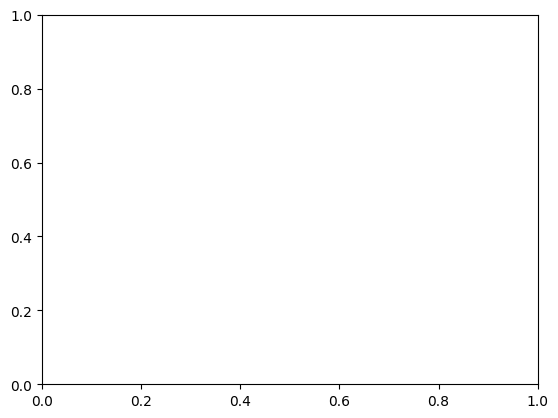

In [ ]:
df5.boxplot('facturacion',rot=90)

In [ ]:
df4.boxplot('INGRPER',rot=90)

NameError: name 'df4' is not defined

In [ ]:
df4.boxplot(column=['INGRPER'],by='Cat_SEXO', figsize=(12,6), return_type='axes')

NameError: name 'df4' is not defined

In [ ]:
sns.boxplot(x='Cat_SEXO', y='INGRPER', data=df4)
plt.title('Ingresos personales según por Sexo')
plt.suptitle('BoxPlot')
plt.xlabel('Sexo')
plt.ylabel('Ingreso Personal')

NameError: name 'df4' is not defined

## **G.2.**  Violin.

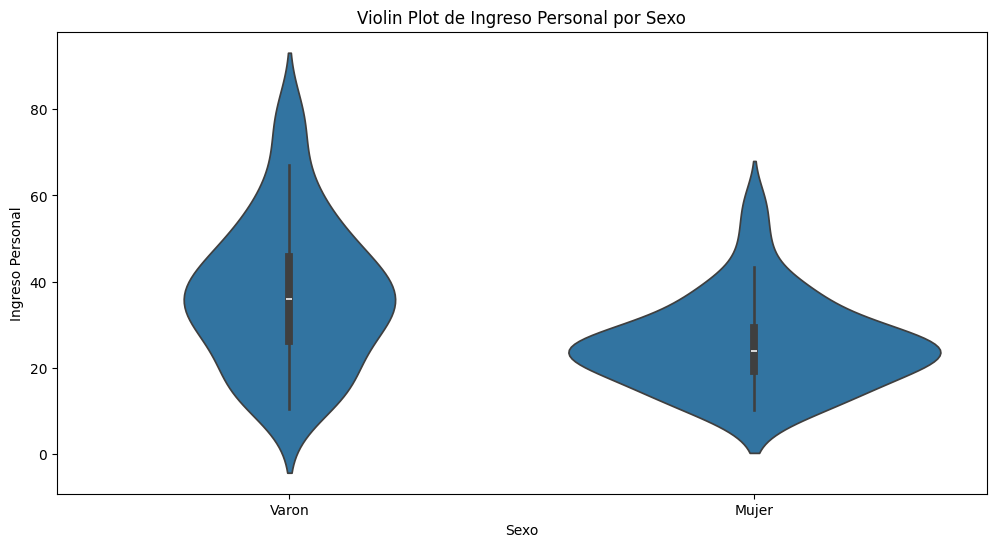

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Cat_SEXO', y='INGRPER', data=df4)
plt.title('Ingresos personales según por Sexo')
plt.suptitle('ViolinPlot')
plt.xlabel('Sexo')
plt.ylabel('Ingreso Personal')

## **G.3.**  Histograma.

Text(0, 0.5, 'Densidad')

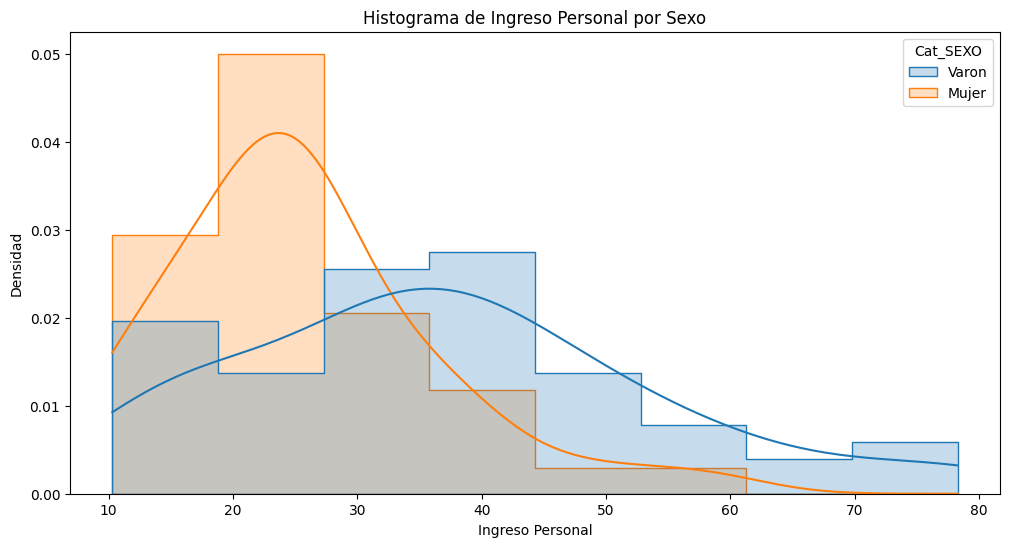

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df4, x='INGRPER', hue='Cat_SEXO', kde=True, element="step", stat="density", common_norm=False)
plt.title('Histograma de Ingreso Personal por Sexo')
plt.xlabel('Ingreso Personal')
plt.ylabel('Densidad')

## **G.4.** Densidad Kendall.

Text(0, 0.5, 'Densidad')

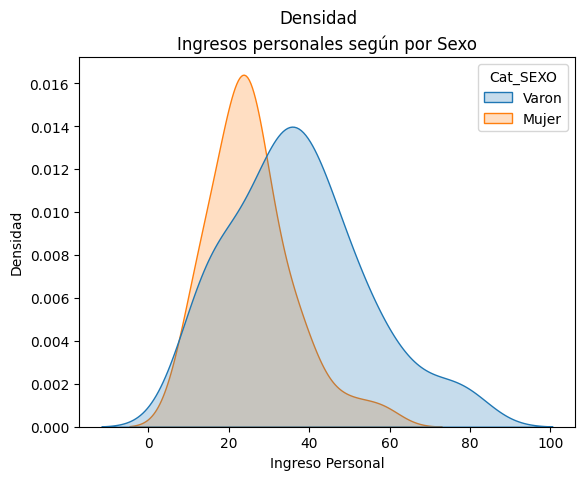

In [ ]:
sns.kdeplot(data=df4, x='INGRPER', hue='Cat_SEXO', fill=True)
plt.title('Ingresos personales según por Sexo')
plt.suptitle('Densidad Kendall')
plt.xlabel('Ingreso Personal')
plt.ylabel('Densidad')

# **H.** EMPAREJAMIENTO DE BASES DE DATOS.

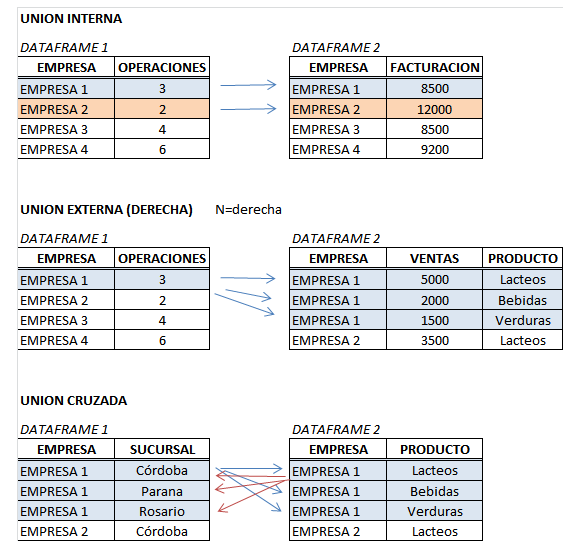

## **H.1.**  Union Interna.

**Modulo** "*merge*"

In [ ]:
df5

,anio,mes,mes-anio,provincia,rubro A12,facturacion
0,2019,1,ene-19,BUENOS AIRES,Anteojos,"30,878,823"
1,2019,1,ene-19,BUENOS AIRES,Artículos de Librería,"4,657,723"
2,2019,1,ene-19,BUENOS AIRES,Balnearios,"5,839,079"
3,2019,1,ene-19,BUENOS AIRES,Bicicletas,"20,645,150"
4,2019,1,ene-19,BUENOS AIRES,Calzado y Marroquinería,"229,075,801"
...,...,...,...,...,...,...
19583,2022,2,feb-22,TUCUMAN,Perfumeria,"6,809,876"
19584,2022,2,feb-22,TUCUMAN,Servicios de cuidado personal,"590,783"
19585,2022,2,feb-22,TUCUMAN,Servicios de preparacion para el deporte,"791,256"
19586,2022,2,feb-22,TUCUMAN,Servicios tecnicos de electronica y electrodom...,"2,197,028"


In [ ]:
df6 = pd.read_excel("/content/drive/MyDrive/08_ ICD con Python /Unidad 2: Base de datos/ahora12_operaciones.xlsx")
df6

,anio,mes,mes-anio,provincia,rubro A12,operaciones
0,2019,1,2019-01-01,BUENOS AIRES,Anteojos,8165
1,2019,1,2019-01-01,BUENOS AIRES,Artículos de Librería,1096
2,2019,1,2019-01-01,BUENOS AIRES,Balnearios,1018
3,2019,1,2019-01-01,BUENOS AIRES,Bicicletas,1429
4,2019,1,2019-01-01,BUENOS AIRES,Calzado y Marroquinería,122273
...,...,...,...,...,...,...
19583,2022,2,2022-02-01,TUCUMAN,Perfumeria,6809876
19584,2022,2,2022-02-01,TUCUMAN,Servicios de cuidado personal,590783
19585,2022,2,2022-02-01,TUCUMAN,Servicios de preparacion para el deporte,791256
19586,2022,2,2022-02-01,TUCUMAN,Servicios tecnicos de electronica y electrodom...,2197028


In [ ]:
df5_df6 = pd.merge(left=df5,right=df6, left_on=['mes-anio','provincia','rubro A12'], right_on=['mes-anio','provincia','rubro A12'] )
#df5_df6

ValueError: You are trying to merge on object and datetime64[ns] columns for key 'mes-anio'. If you wish to proceed you should use pd.concat

,anio_x,mes_x,mes-anio,provincia,rubro A12,facturacion,anio_y,mes_y,operaciones


## **H.2.**  Union Izquierda.

In [ ]:
#df6_df7 = pd.merge(left=df5,right=df6, , how='left', left_on=['mes-anio','provincia','rubro A12'], right_on=['mes-anio','provincia','rubro A12'] )
#df6_df7

In [ ]:
#df6_df7[ pd.isnull(df6_df7.genus) ]

# **I.** CODIFICACION DE VARIABLES.

In [ ]:
df5_df6['provincia'].unique()

array(['BUENOS AIRES', 'CATAMARCA', 'CHACO', 'CHUBUT',
       'CIUDAD AUTONOMA DE BUENOS AIRES', 'CORDOBA', 'CORRIENTES',
       'ENTRE RIOS', 'FORMOSA', 'JUJUY', 'LA PAMPA', 'LA RIOJA',
       'MENDOZA', 'MISIONES', 'NEUQUEN', 'RIO NEGRO', 'SALTA', 'SAN JUAN',
       'SAN LUIS', 'SANTA CRUZ', 'SANTA FE', 'SANTIAGO DEL ESTERO',
       'TIERRA DEL FUEGO', 'TUCUMAN', 'CUIDAD AUTONOMA DE BUENOS AIRES',
       'SALTA ', 'SAN JUAN '], dtype=object)

## **I.1.**  Agrupar variables numericas en categorias.

**Modulo** "*math*"

In [ ]:
import math

In [ ]:
df5_df6.describe (). apply (lambda s: s.apply (lambda x: format (x, 'f')))

,anio_x,mes_x,mes-anio,Facturacion,anio_y,mes_y,operaciones
count,19386.000000,19386.000000,19386.000000,19386.000000,19386.000000,19386.000000,19386.000000
mean,2020.222067,6.456412,f,104746879.526153,2020.222067,6.456412,3791501.551016
min,2019.000000,1.000000,f,1.000000,2019.000000,1.000000,1.000000
25%,2019.000000,3.000000,f,824119.000000,2019.000000,3.000000,83.000000
50%,2020.000000,7.000000,f,5095056.500000,2020.000000,7.000000,545.000000
75%,2021.000000,10.000000,f,33578482.750000,2021.000000,10.000000,3443.750000
max,2022.000000,12.000000,f,19050140203.000000,2022.000000,12.000000,11836140376.000000
std,0.885879,3.555200,nan,577758304.453136,0.885879,3.555200,135072746.979234


In [ ]:
valores = [-math.inf,5000000, 15000000, 30000000, 45000000, math.inf]

In [ ]:
categorias = ["Muy Baja", "Baja", "Regular", "Alta", "Muy Alta"]

**Metodo** "*cut*"

In [ ]:
df5_df6['Facturacion_cat']=pd.cut(x=df5_df6['Facturacion'],bins=valores, labels=categorias)

In [ ]:
df5_df6['Facturacion_cat'].unique()

['Alta', 'Muy Baja', 'Baja', 'Regular', 'Muy Alta']
Categories (5, object): ['Muy Baja' < 'Baja' < 'Regular' < 'Alta' < 'Muy Alta']

## **I.2.**  Reagrupar categorias.

**Metodo** "*replace*"

In [ ]:
df5_df6['Facturacion_cat'].replace({'Muy Baja': "Baja", 'Baja': "Baja", 'Regular': "Media", 'Alta': "Alta", 'Muy Alta': "Alta"}, inplace=True)

In [ ]:
df5_df6['Facturacion_cat'].unique()

['Alta', 'Baja', 'Media']
Categories (3, object): ['Baja' < 'Media' < 'Alta']

# **J.** ESTRUCTURAS CONDICIONALES.

## **J.1.**  Condiciones.

In [ ]:
df5.info()

In [ ]:
df5['Facturacion']

0         30878823
1          4657723
2          5839079
3         20645150
4        229075801
           ...    
19583      6809876
19584       590783
19585       791256
19586      2197028
19587     13333075
Name: Facturacion, Length: 19588, dtype: int64

**Metodo** "*where*"

In [ ]:
df5_df6['Facturacion_cat2']=np.where(df5_df6['Facturacion']<30000000, 'Baja', 'Alta')

In [ ]:
df5_df6.head(5)

,anio_x,mes_x,mes-anio,provincia,rubro A12,Facturacion,anio_y,mes_y,operaciones,Facturacion_cat,Facturacion_cat2
0,2019,1,2019-01-01,BUENOS AIRES,Anteojos,30878823,2019,1,8165,Alta,Alta
1,2019,1,2019-01-01,BUENOS AIRES,Artículos de Librería,4657723,2019,1,1096,Baja,Baja
2,2019,1,2019-01-01,BUENOS AIRES,Balnearios,5839079,2019,1,1018,Baja,Baja
3,2019,1,2019-01-01,BUENOS AIRES,Bicicletas,20645150,2019,1,1429,Media,Baja
4,2019,1,2019-01-01,BUENOS AIRES,Calzado y Marroquinería,229075801,2019,1,122273,Alta,Alta


In [ ]:
from IPython.display import display, HTML
display(HTML('<h2 style="color:yellow">OPERADORES</h2>'))

'**or**'<br> ("**|**")

In [ ]:
df5_df6['VolTrans']= np.where((df5_df6['Facturacion']<30000000)|(df5_df6['operaciones']<8000),'Baja','Alta')

In [ ]:
df5_df6.head(5)

,anio_x,mes_x,mes-anio,provincia,rubro A12,Facturacion,anio_y,mes_y,operaciones,Facturacion_cat,Facturacion_cat2,VolTrans
0,2019,1,2019-01-01,BUENOS AIRES,Anteojos,30878823,2019,1,8165,Alta,Alta,Alta
1,2019,1,2019-01-01,BUENOS AIRES,Artículos de Librería,4657723,2019,1,1096,Baja,Baja,Baja
2,2019,1,2019-01-01,BUENOS AIRES,Balnearios,5839079,2019,1,1018,Baja,Baja,Baja
3,2019,1,2019-01-01,BUENOS AIRES,Bicicletas,20645150,2019,1,1429,Media,Baja,Baja
4,2019,1,2019-01-01,BUENOS AIRES,Calzado y Marroquinería,229075801,2019,1,122273,Alta,Alta,Alta


'**and**'<br> ("**&**")

In [ ]:
#np.where((df5_df6['Facturacion']<30000000)&(df5_df6['operaciones']<8000),'Baja','Alta')

array(['Alta', 'Baja', 'Baja', ..., 'Alta', 'Alta', 'Alta'], dtype='<U4')

In [ ]:
from IPython.display import display, HTML
display(HTML('<h2 style="color:yellow">CONDICIONES SIMULTANEAS SOBRE LISTA</h2>'))

In [ ]:
vars=['Facturacion','operaciones']

In [ ]:
vars

['Facturacion', 'operaciones']

In [ ]:
df5_df6['VolTrans2']=np.where((df5_df6[vars]<1500).any(axis=1),'Baja','Alta')

## **J.2.**  Filtros.

**Metodo** "*select*"

In [ ]:
condicion = [
             (df5_df6['VolTrans']=='Alta')&(df5_df6['provincia']=='CORDOBA')&(df5_df6['anio_x']<=2019),
             (df5_df6['VolTrans']=='Baja')&(df5_df6['provincia']!='CORDOBA')&(df5_df6['anio_x']>2019)
]
opciones = ['seleccionado','no_seleccionado']
df5_df6['filtro'] = np.select(condicion, opciones)

In [ ]:
df5_df6.head(90)

,anio_x,mes_x,mes-anio,provincia,rubro A12,Facturacion,anio_y,mes_y,operaciones,Facturacion_cat,Facturacion_cat2,VolTrans,VolTrans2,filtro
0,2019,1,2019-01-01,BUENOS AIRES,Anteojos,30878823,2019,1,8165,Alta,Alta,Alta,Alta,0
1,2019,1,2019-01-01,BUENOS AIRES,Artículos de Librería,4657723,2019,1,1096,Baja,Baja,Baja,Baja,0
2,2019,1,2019-01-01,BUENOS AIRES,Balnearios,5839079,2019,1,1018,Baja,Baja,Baja,Baja,0
3,2019,1,2019-01-01,BUENOS AIRES,Bicicletas,20645150,2019,1,1429,Media,Baja,Baja,Baja,0
4,2019,1,2019-01-01,BUENOS AIRES,Calzado y Marroquinería,229075801,2019,1,122273,Alta,Alta,Alta,Alta,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2019,1,2019-01-01,CORDOBA,Calzado y Marroquinería,54696992,2019,1,27069,Alta,Alta,Alta,Alta,seleccionado
86,2019,1,2019-01-01,CORDOBA,Colchones,15383306,2019,1,1229,Media,Baja,Baja,Baja,0
87,2019,1,2019-01-01,CORDOBA,Electrodomésticos,113910312,2019,1,10495,Alta,Alta,Alta,Alta,seleccionado
88,2019,1,2019-01-01,CORDOBA,Indumentaria,217350590,2019,1,98061,Alta,Alta,Alta,Alta,seleccionado


Booleano -> Lista

In [ ]:
print(df5_df6['filtro']=='seleccionado')

0        False
1        False
2        False
3        False
4        False
         ...  
19381    False
19382    False
19383    False
19384    False
19385    False
Name: filtro, Length: 19386, dtype: bool


In [ ]:
df5_df6[(df5_df6['filtro']=='seleccionado')]

,anio_x,mes_x,mes-anio,provincia,rubro A12,Facturacion,anio_y,mes_y,operaciones,Facturacion_cat,Facturacion_cat2,VolTrans,VolTrans2,filtro
85,2019,1,2019-01-01,CORDOBA,Calzado y Marroquinería,54696992,2019,1,27069,Alta,Alta,Alta,Alta,seleccionado
87,2019,1,2019-01-01,CORDOBA,Electrodomésticos,113910312,2019,1,10495,Alta,Alta,Alta,Alta,seleccionado
88,2019,1,2019-01-01,CORDOBA,Indumentaria,217350590,2019,1,98061,Alta,Alta,Alta,Alta,seleccionado
92,2019,1,2019-01-01,CORDOBA,Materiales para la construcción,108872826,2019,1,10498,Alta,Alta,Alta,Alta,seleccionado
473,2019,2,2019-02-01,CORDOBA,Calzado y Marroquinería,57990924,2019,2,27518,Alta,Alta,Alta,Alta,seleccionado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4599,2019,12,2019-12-01,CORDOBA,Juguetes y Juegos de mesa,65075602,2019,12,23008,Alta,Alta,Alta,Alta,seleccionado
4601,2019,12,2019-12-01,CORDOBA,Materiales para la construcción,555444669,2019,12,51221,Alta,Alta,Alta,Alta,seleccionado
4602,2019,12,2019-12-01,CORDOBA,Motocicletas,367104526,2019,12,21299,Alta,Alta,Alta,Alta,seleccionado
4604,2019,12,2019-12-01,CORDOBA,Muebles,119661887,2019,12,8697,Alta,Alta,Alta,Alta,seleccionado


In [ ]:
from IPython.display import display, HTML
display(HTML('<h2 style="color:yellow">Ejemplo de Filtro</h2>'))

In [ ]:
condicion = [
             (df5_df6['rubro A12']=='Electrodomésticos')&(df5_df6['provincia']=='CORDOBA')&(df5_df6['anio_x']<=2019),
             (df5_df6['rubro A12']!='Electrodomésticos')&(df5_df6['provincia']!='CORDOBA')&(df5_df6['anio_x']<2019)
]
opciones = ['seleccionado','no_seleccionado']
df5_df6['filtro2'] = np.select(condicion, opciones)

In [ ]:
cba_elect=df5_df6[(df5_df6['filtro2']=='seleccionado')]
cba_elect

,anio_x,mes_x,mes-anio,provincia,rubro A12,Facturacion,anio_y,mes_y,operaciones,Facturacion_cat,Facturacion_cat2,VolTrans,VolTrans2,filtro,filtro2
87,2019,1,2019-01-01,CORDOBA,Electrodomésticos,113910312,2019,1,10495,Alta,Alta,Alta,Alta,seleccionado,seleccionado
475,2019,2,2019-02-01,CORDOBA,Electrodomésticos,103079886,2019,2,9310,Alta,Alta,Alta,Alta,seleccionado,seleccionado
865,2019,3,2019-03-01,CORDOBA,Electrodomésticos,140615934,2019,3,12237,Alta,Alta,Alta,Alta,seleccionado,seleccionado
1251,2019,4,2019-04-01,CORDOBA,Electrodomésticos,124670579,2019,4,10539,Alta,Alta,Alta,Alta,seleccionado,seleccionado
1627,2019,5,2019-05-01,CORDOBA,Electrodomésticos,129195011,2019,5,11255,Alta,Alta,Alta,Alta,seleccionado,seleccionado
2026,2019,6,2019-06-01,CORDOBA,Electrodomésticos,439311096,2019,6,33437,Alta,Alta,Alta,Alta,seleccionado,seleccionado
2433,2019,7,2019-07-01,CORDOBA,Electrodomésticos,586040132,2019,7,46315,Alta,Alta,Alta,Alta,seleccionado,seleccionado
2858,2019,8,2019-08-01,CORDOBA,Electrodomésticos,657943311,2019,8,48676,Alta,Alta,Alta,Alta,seleccionado,seleccionado
3293,2019,9,2019-09-01,CORDOBA,Electrodomésticos,592893184,2019,9,39690,Alta,Alta,Alta,Alta,seleccionado,seleccionado
3721,2019,10,2019-10-01,CORDOBA,Electrodomésticos,1249734520,2019,10,76737,Alta,Alta,Alta,Alta,seleccionado,seleccionado


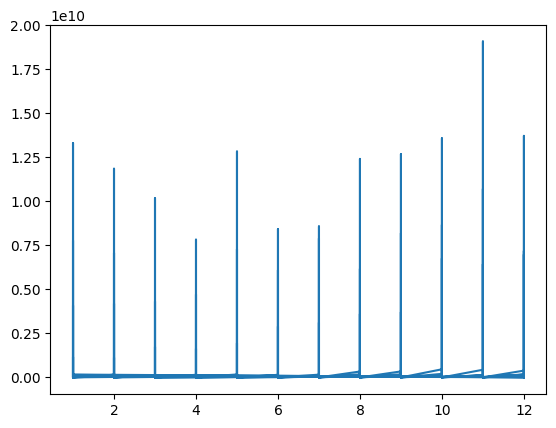

In [ ]:
plt.plot(df5_df6['mes_x'], df5_df6['Facturacion'])

# **K.** CALCULOS DE NUEVAS VARIABLES.

In [ ]:
df5['mes-anio']

In [ ]:
df5['provincia']

## **K.1.**  Concatenacion.

In [ ]:
ID = df5['mes-anio'] + df5['provincia']

In [ ]:
ID = str(df5['mes-anio']) + df5['provincia']

In [ ]:
ID

In [ ]:
ID[1]

**funcion** "*map*"

In [ ]:
ID2 = df5['mes-anio'].map(str) + df5['provincia']

In [ ]:
ID2

In [ ]:
df5['ID'] = ID2

In [ ]:
df5.info()

## **K.2.**  Nueva variable a partir del calculo de existentes.

'Indice1' es el cociente entre la facturacion y el numero de operaciones realizadas en cada rubro, de cada provincia, en cada mes registrado.

In [ ]:
df5_df6['Facturacion']/df5_df6['operaciones']

In [ ]:
df5_df6['indice1']= df5_df6['Facturacion']/df5_df6['operaciones']

# **L.** GUARDAR BASE DE DATOS.

In [ ]:
df5_df6

## **L.1.**  Guardar como excel.

In [ ]:
df5_df6.to_excel("/content/drive/MyDrive/Colab Notebooks/Bases de Datos/ahora12.xlsx")

## **L.2.**  Guardar como csv.

In [ ]:
df5_df6.to_csv("/content/drive/MyDrive/Colab Notebooks/Bases de Datos/ahora12.csv", sep=";")

# Gestión de Datos

La gestión de datos comienza con la identificación clara del problema a resolver y la evaluación de
la disponibilidad y calidad de los datos. Una vez que se cuentan con los datos necesarios, es
importante clasificarlos adecuadamente (estructurados, no estructurados, semiestructurados) y
aplicar las herramientas y técnicas correspondientes para su análisis. El modelo relacional sigue
siendo uno de los enfoques más comunes, pero el manejo de datos no estructurados y
semiestructurados también juega un papel importante en el análisis avanzado.

## 1. Proceso Inicial de Identificación y Evaluación del Problema:
* Investigar el problema: Antes de trabajar con datos, es crucial asegurarse de que el
problema a resolver es realmente un problema y determinar si se puede abordar con
datos.
* Preguntas clave:
  * ¿El problema ha sido abordado antes?
  * ¿Existen datos disponibles?
  * ¿Qué tipo de datos necesitamos?
  * ¿Qué fuentes de datos están accesibles?
  * ¿Cuánta calidad tienen los datos disponibles? ¿Quién es el propietario de los
datos?
* Si no hay datos disponibles:
  * ¿Es necesario recolectarlos?
  * ¿De qué fuentes? ¿Cómo se recogerán?
  * ¿Cuántos datos son necesarios para el análisis? ¿Se utilizarán muestras?
  * ¿Las fuentes de datos son seguras y confiables?

## 2. Estructura de los Datos:
* Datos como registros: Los datos son conjuntos de registros donde cada registro tiene
asociado un conjunto de características. Las características se pueden asociar de
diferentes maneras.
* Formato de almacenamiento: Estos registros se almacenan en diferentes formatos según
la necesidad y el tipo de datos.
* Base de Datos: Un conjunto de datos almacenados de manera sistemática. Esto puede
incluir bases de datos relacionales o no relacionales.

## 3. Modelos de Bases de Datos:
* Modelo Relacional: Es uno de los modelos más comunes para representar datos. En este
modelo, los datos se visualizan en tablas con filas y columnas, y las relaciones entre las
diferentes tablas se describen mediante claves primarias y foráneas.

# Tipos de datos (estructurados y no estructurados) y su tratamiento

## Datos Estructurados:
**Descripción:** Son aquellos organizados en un formato predefinido y fijo, como tablas de bases de
datos relacionales. Los datos se almacenan en filas y columnas con etiquetas claras, lo que facilita
su búsqueda, análisis y procesamiento.

**Ejemplo:** Base de datos de estudiantes con columnas como ID, Nombre, Carrera, Promedio.

## Datos No Estructurados:
**Descripción:** Son aquellos datos que no siguen una organización predefinida. Generalmente,
incluyen texto, imágenes, audios, videos, y otros formatos que requieren técnicas avanzadas
(como inteligencia artificial, minería de datos) para su análisis.

**Ejemplo:** Correos electrónicos, grabaciones de clases, publicaciones en redes sociales, imágenes
escaneadas.

## Datos Semiestructurados:
**Descripción:** Son datos que no siguen un esquema fijo como una tabla relacional, pero sí tienen
una organización interna definida, que facilita su análisis. No son tan estructurados como los datos
relacionales, pero contienen etiquetas, llaves o estructuras jerárquicas que ayudan a interpretar el
contenido.

**Ejemplo:** Archivos JSON, XML, datos de registros en logs de servidores, etc.

# Limpieza e integración de datos. Técnicas de curación de datos e ingeniería de características (feature engineering)

La limpieza e integración de datos son pasos fundamentales para garantizar que los datos sean
útiles, precisos y consistentes antes de ser utilizados en el análisis y modelado. Las técnicas de
imputación, eliminación de duplicados, corrección de errores y tratamiento de valores atípicos son
fundamentales a la hora de llevar a cabo un proyecto.

Aquí están algunas de las técnicas clave que se utilizan en este proceso:

## 1. Eliminación o Imputación de Datos Faltantes
**Problema →** Los datos incompletos son comunes en muchas bases de datos, con valores
ausentes en filas o columnas.

**Posibles Soluciones:**
* Eliminar las filas o columnas si el porcentaje de datos faltantes es alto (esto puede ser
eficiente si los datos faltantes son pocos en comparación con el volumen total).
* Imputación de valores utilizando La media o mediana (si los datos son numéricos), o
Modelos predictivos como regresión (imputación por regresión), donde se predicen los
valores faltantes basados en las demás variables.

## 2. Eliminación de Duplicados
**Problema →** Los datos pueden contener entradas repetidas debido a errores de recopilación o
almacenamiento.

**Posible Solución:**
* Identificar y eliminar las filas duplicadas para evitar sesgos o duplicaciones en los análisis y
modelos.

## 3. Corrección de Errores Tipográficos o Inconsistencias
**Problema →** En ocasiones, los datos pueden contener errores tipográficos, diferencias en
mayúsculas/minúsculas, o inconsistencias en los nombres y categorías.

**Posible Solución:**
* Normalización de texto: Homogeneizar los datos de texto para asegurar la consistencia.
Esto incluye: Convertir todo a minúsculas o mayúsculas y Corregir errores ortográficos.
Asegurar que las categorías sean coherentes (por ejemplo, "Argentina", "argentina", y "ARG"
deben ser considerados como el mismo valor).

## 4. Eliminación de Valores Atípicos (Outliers)
**Problema →** Los outliers pueden distorsionar los análisis, afectando la precisión de los modelos.

**Posible Solución:**
* Detectar outliers mediante métodos estadísticos como: Desviación estándar o IQR (Rango
intercuartílico): Se detectan valores fuera del rango de [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].
* Visualizaciones: Usar gráficos como los boxplots para identificar valores atípicos
visualmente.

## Ingeniería de Características (Feature Engineering)
La ingeniería de características se refiere al proceso de transformación de datos existentes para
crear nuevas variables que mejoren el rendimiento de los modelos de aprendizaje automático.
Algunas de sus tareas son:

Crear características más representativas que ayuden a los modelos a entender mejor las
relaciones y patrones en los datos a través de la creación de nuevas variables.
* Ejemplo: Si tenemos las variables "Precio" y "Cantidad vendida", podemos calcular
"Ingresos" como el producto de estas dos variables.

Transformar datos a través de procesos como normalización, codificación de variables categóricas
o la transformación matemática.
* Normalización: Es el proceso de ajustar los valores de las variables para que tengan la
misma escala. Por ejemplo, transformar los ingresos para que estén en un rango entre 0 y
1.
* Codificación de Variables Categóricas: Transformar variables de texto en valores
numéricos para que puedan ser utilizadas por los modelos. Por ejemplo, convertir las
categorías "Sí" y "No" en 1 y 0 respectivamente.
* Transformación Matemática: Aplicar funciones matemáticas como el logaritmo para reducir
la asimetría en distribuciones sesgadas (esto es útil cuando los datos tienen una gran
dispersión)

Busca la reducción de Dimensionalidad. Cuando se tienen demasiadas variables, esto puede
aumentar la complejidad del modelo y hacer que se tarde más en entrenar, por lo que técnicas
como el Análisis de Componentes Principales (PCA) permiten reducir la cantidad de
características sin perder la información más relevante. PCA busca combinar las variables
originales en nuevas variables (componentes) que expliquen la mayor parte de la variabilidad en
los datos.

# Estandarización de procesos

La estandarización de procesos en ciencia de datos es fundamental para garantizar que los
proyectos sean manejados de manera eficiente, confiable y coherente. Esta práctica es esencial
cuando los proyectos requieren colaboración entre diferentes equipos, integración de múltiples
fuentes de datos y escalabilidad en los modelos de machine learning.

## Importancia de la Estandarización en Ciencia de Datos
La estandarización de procesos en ciencia de datos no solo facilita el trabajo individual de los
científicos de datos, sino que también beneficia a los equipos que colaboran en proyectos más
grandes, permitiendo la replicabilidad, calidad y eficiencia de las soluciones. Aquí se detallan
algunos de los beneficios más importantes:

* Reproducibilidad: La estandarización garantiza que los análisis y modelos sean replicables,
es decir, que los resultados sean consistentes cuando se repiten los mismos procesos con
los mismos datos.
* Calidad de los Datos: La estandarización ayuda a reducir errores y asegura que los datos
sean limpios y estructurados antes de su análisis. La calidad del dato es uno de los pilares
más importantes para obtener resultados válidos.
* Eficiencia Operativa: Optimiza el tiempo invertido en cada fase del proceso, desde la
recolección hasta el modelado. Esto permite que los equipos se concentren en tareas de
mayor valor, como la mejora del modelo y la exploración de nuevas variables.
* Facilita la Colaboración: Equipos multidisciplinarios, que incluyen científicos de datos,
ingenieros de datos, analistas y otros roles, pueden trabajar de manera más coordinada y
eficiente si siguen un proceso estándar.
* Automatización y Escalabilidad: Los procesos estandarizados permiten automatizar tareas
repetitivas y aplicar soluciones a gran escala de manera coherente, lo que es esencial
cuando los proyectos crecen en volumen o complejidad.

## Fases del Proceso de Ciencia de Datos y su Estandarización
La estandarización se aplica en todas las fases del ciclo de vida de un proyecto de ciencia de
datos, desde la recolección de datos hasta el despliegue de los modelos en producción. Cada fase
tiene sus propios procesos y prácticas que pueden beneficiarse de la estandarización:

### 1. Ingesta y Preprocesamiento de Datos
La ingesta de datos es el primer paso crucial. El proceso estandarizado aquí incluye:
* Definir un formato común para almacenar y procesar los datos.
* Usar herramientas de automatización para la ingesta de datos de diversas fuentes (bases
de datos, archivos, APIs, etc.).
* Asegurar que los datos sean limpiados y preprocesados de manera coherente (remoción
de valores faltantes, tratamiento de duplicados, etc.).

### 2. Exploración y Análisis de Datos
Una vez que los datos están preprocesados, la exploración y el análisis ayudan a descubrir
patrones, tendencias o relaciones:
* Estandarización de herramientas: Usar librerías y frameworks consistentes como pandas,
numpy, matplotlib y seaborn para realizar análisis exploratorios.
* Estandarización de procesos: Definir métodos para realizar análisis estadísticos y
visualización de datos (por ejemplo, correlaciones, boxplots, histogramas).

### 3. Ingeniería de Características (Feature Engineering)
La ingeniería de características es el proceso de crear nuevas variables que mejoren el
rendimiento de los modelos:
* Establecer métodos sistemáticos para la creación de nuevas variables, como la conversión
de fechas en años, la agregación de datos numéricos o la transformación de variables
categóricas en variables binarias.
* Usar herramientas como scikit-learn o TensorFlow que proporcionan métodos
estandarizados para preprocesar y transformar características.

### 4. Modelado y Evaluación
El modelado es una de las fases más críticas, donde se aplican algoritmos de machine learning
para encontrar patrones en los datos:
* Selección de Modelos: Estandarizar el proceso de selección de modelos, asegurando que
se prueben varios modelos para determinar el más adecuado.
* Evaluación: Definir métricas estandarizadas para evaluar el rendimiento de los modelos
(por ejemplo, precisión, recall, AUC-ROC).
* Entrenamiento y validación: Estandarizar los procedimientos de validación cruzada y la
división del conjunto de datos en entrenamiento y prueba.

### 5. Despliegue y Mantenimiento del Modelo
El despliegue se refiere a poner el modelo en producción para que se utilice en el mundo real:
* Estandarización del pipeline de despliegue: Definir procedimientos automáticos para el
despliegue de modelos en entornos de producción, asegurando que el modelo sea
accesible de forma eficiente.
* Mantenimiento: Establecer procesos estándar para el monitoreo del rendimiento del
modelo en tiempo real y la actualización periódica del modelo con nuevos datos.

## Herramientas para la Estandarización en Ciencia de Datos
Existen varias herramientas y plataformas que ayudan en la estandarización de procesos en
ciencia de datos, desde la recolección y limpieza de datos hasta el despliegue y mantenimiento
del modelo:

* Jupyter Notebooks: Ideal para trabajar en un entorno interactivo donde los científicos de datos
pueden combinar código, visualizaciones y documentación en un solo documento. Facilita la
reproducibilidad.
* Git y GitHub: Herramientas de control de versiones para asegurar que el código sea gestionado de
manera eficiente y que los equipos puedan colaborar de forma efectiva.
* Pandas y Numpy: Librerías de Python que proporcionan métodos estandarizados para el manejo
de datos estructurados y para la manipulación matemática y estadística.
* Scikit-learn: Una de las librerías más populares para machine learning en Python. Permite
estandarizar el proceso de modelado, desde la selección de modelos hasta la evaluación.
* Docker y Kubernetes: Herramientas que permiten contenerizar y orquestar el despliegue de
modelos de machine learning, facilitando la estandarización en el proceso de despliegue y
escalabilidad.
* Airflow: Una herramienta de automatización de flujos de trabajo que ayuda a estandarizar las
tareas de procesamiento de datos y el despliegue de modelos a gran escala.

# Principios en el manejo de base de datos

El manejo adecuado de bases de datos es fundamental para asegurar la integridad, seguridad,
rendimiento y escalabilidad de la información almacenada. A continuación, se detallan los
principales principios que guían la gestión eficiente de bases de datos.

## Principio de Integridad
El principio de integridad se asegura de que los datos almacenados sean precisos, consistentes y
válidos a lo largo del tiempo. Esto es crucial para evitar errores y mantener la fiabilidad de la base
de datos. Existen varios tipos de integridad:

* Integridad de entidad: Cada registro debe ser único y fácilmente identificable mediante una
clave primaria.

**Ejemplo:** En una base de datos de empleados, el campo "ID de empleado" debe ser único para
cada registro de empleado.

* Integridad referencial: Las relaciones entre tablas deben ser coherentes y gestionadas
mediante claves foráneas.

**Ejemplo:** En una base de datos de empleados y departamentos, si un departamento es eliminado,
los empleados que pertenecían a ese departamento deben ser actualizados o eliminados
correctamente para no dejar datos huérfanos.

* Integridad de dominio: Cada campo debe contener solo valores válidos dentro de un rango
definido.

**Ejemplo:** En una base de datos de empleados, el campo "Edad" debe contener valores numéricos
dentro de un rango válido, como entre 18 y 100 años.

## Principio de Normalización
La normalización es un proceso que busca reducir la redundancia de datos y mejorar la eficiencia
en el almacenamiento. Además, ayuda a minimizar posibles problemas cuando se insertan,
eliminan o actualizan registros en la base de datos.

* Eliminar datos duplicados: Asegura que la base de datos no contenga registros repetidos
que aumenten el tamaño innecesariamente y generen inconsistencias.
* Minimizar las anomalías: La normalización permite evitar problemas como la actualización
de datos de forma inconsistente o la inserción de datos erróneos.
* Flexibilidad y escalabilidad: Asegura que la base de datos se pueda expandir sin que se
generen problemas a largo plazo.

**Ejemplo:** En una base de datos de ventas, en lugar de almacenar los detalles del cliente en cada
transacción, se crean tablas separadas: Clientes (con id_cliente, nombre, dirección) y Ventas (con
id_venta, id_cliente, total). Esto evita la duplicación de información y hace que la base de datos
sea más eficiente.

## Principio de Seguridad de Datos
La seguridad de los datos es esencial para evitar accesos no autorizados, pérdida de datos y
violaciones de privacidad. Para garantizar esto, se deben aplicar diversas medidas de protección:

* Autenticación y autorización: Usar roles de usuario con privilegios específicos (por ejemplo,
Administrador, Lectura, Escritura) para controlar quién puede acceder y modificar los
datos.
* Encriptación de datos: Los datos sensibles deben ser cifrados para garantizar que no se
puedan leer en caso de que sean interceptados.
* Control de accesos: Establecer permisos y realizar auditorías periódicas para garantizar
que solo los usuarios autorizados tengan acceso a los datos y puedan realizar cambios.
* Respaldos y recuperación: Realizar copias de seguridad periódicas de la base de datos
para asegurar que la información no se pierda en caso de fallos del sistema.

**Ejemplo:** En un sistema bancario, solo los empleados con privilegios de administrador pueden
modificar saldos de cuentas, mientras que los cajeros solo pueden ver y registrar transacciones.

## Principio de Rendimiento y Optimización
El rendimiento de la base de datos es crucial para asegurar que las consultas y operaciones se
realicen de manera eficiente. Para mejorar la velocidad y la eficiencia de las consultas, se pueden
aplicar diversas buenas prácticas:

* Uso de índices: Los índices aceleran la búsqueda de datos, mejorando el tiempo de
respuesta de las consultas.
* Optimización de consultas SQL: Es recomendable evitar el uso innecesario de SELECT * y
enfocarse en seleccionar solo las columnas necesarias para reducir la carga de la
consulta.
* Implementación de caché: Utilizar caché para almacenar resultados de consultas
frecuentes y evitar accesos repetidos a la base de datos.
* Particionamiento de tablas: Dividir tablas grandes en fragmentos (particiones) para
distribuir mejor la carga y mejorar la eficiencia de las consultas.

**Ejemplo:** Si una tienda en línea consulta frecuentemente los productos más vendidos, puede
crearse un índice en la columna "ventas" para acelerar la búsqueda.

## Principio de Transacciones y ACID
Las transacciones son operaciones que se realizan sobre la base de datos y deben cumplir con el
conjunto de propiedades ACID (Atomicidad, Consistencia, Aislamiento y Durabilidad). Estas
propiedades garantizan que las transacciones se procesen de manera confiable.

* Atomicidad: Cada transacción debe ser tratada como una unidad indivisible. Si alguna
parte de la transacción falla, toda la transacción debe revertirse para evitar inconsistencias.
* Consistencia: La base de datos debe pasar de un estado válido a otro estado válido
después de una transacción.
* Aislamiento: Las transacciones concurrentes deben ejecutarse como si fueran operaciones
independientes, sin que una transacción afecte a las demás.
* Durabilidad: Una vez que una transacción se confirma, sus cambios deben ser
permanentes, incluso en caso de fallos del sistema.

**Ejemplo:** En una transferencia bancaria, si el dinero se descuenta de la cuenta A pero no se
acredita en la cuenta B, la transacción se revierte para evitar inconsistencias.

## Principio de Escalabilidad y Disponibilidad
Cuando se manejan bases de datos en sistemas grandes o con altos volúmenes de usuarios, la
escalabilidad y la disponibilidad se convierten en aspectos cruciales para mantener un rendimiento
adecuado.

* Replicación: Crear copias de la base de datos en varios servidores para mejorar la
disponibilidad y asegurar que los datos estén siempre accesibles, incluso si uno de los
servidores falla.
* Sharding: Dividir la base de datos en fragmentos más pequeños, llamados "shards", que
pueden distribuirse entre varios servidores, mejorando la gestión de grandes volúmenes de
datos.
* Balanceo de carga: Distribuir las consultas entre varios servidores para equilibrar la carga
y evitar que un servidor se sobrecargue.

**Ejemplo:** Empresas como Google y Facebook utilizan bases de datos distribuidas con replicación
para soportar millones de usuarios simultáneamente.

# Uso de Python. Librerías: pandas, numpy, SciPy

Python es un lenguaje de programación de alto nivel, interpretado y de propósito general,
conocido por su sintaxis clara y sencilla, lo que lo hace muy fácil de aprender, especialmente para
principiantes.

## ¿Por qué se usa tanto en ciencia de datos?
Porque tiene librerías muy potentes para el análisis, visualización y modelado de datos, y permite
trabajar de forma rápida y sencilla con grandes volúmenes de información.

Las librerías Pandas, NumPy, SciPy y Seaborn son esenciales en el análisis de datos y la ciencia
de datos en Python.

## Pandas
Pandas es una de las librerías más populares para la manipulación y análisis de datos. Facilita el
trabajo con datos estructurados, como los que se encuentran en tablas, hojas de cálculo o bases
de datos. Sus estructuras de datos más importantes son:

* DataFrame: Una estructura bidimensional similar a una tabla de base de datos o a una
hoja de cálculo, que contiene filas y columnas.
* Series: Una estructura unidimensional, similar a una lista o una columna de una tabla.

## NumPy
NumPy es una librería para realizar cálculos científicos y matemáticos con Python. Se centra en la
eficiencia del cálculo mediante el uso de arreglos multidimensionales (como matrices), que
permiten trabajar con grandes volúmenes de datos numéricos de manera rápida.

## SciPy
SciPy es una librería que extiende las funcionalidades de NumPy. Es útil para resolver problemas
complejos como optimización, integración numérica, álgebra lineal, estadísticas, etc. SciPy utiliza
las estructuras de datos de NumPy, lo que lo hace compatible y eficiente.

## Seaborn
Seaborn es una librería de visualización de datos basada en Matplotlib, que facilita la creación de
gráficos estadísticos complejos y estéticamente agradables. Seaborn proporciona una interfaz
más sencilla para crear gráficos como histogramas, diagramas de caja, diagramas de dispersión,
etc.